In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv(r'C:\Users\Hp\Desktop\dataset.csv')
dataset.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
dataset.shape

(8523, 12)

In [4]:
dataset.shape[0]

8523

In [5]:
dataset.shape[1]

12

In [6]:
dataset.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
dataset.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
for i in dataset.columns:
    if dataset.dtypes[i] == 'O':
        print(i)

Item_Identifier
Item_Fat_Content
Item_Type
Outlet_Identifier
Outlet_Size
Outlet_Location_Type
Outlet_Type


In [9]:
dataset.dtypes[0]

dtype('O')

In [10]:
dataset.dtypes[1]

dtype('float64')

In [11]:
a = []
b = []
for i in dataset.columns:
    if dataset.dtypes[i] == 'O':
        a.append(i)
    if dataset.dtypes[i] == 'float64':
        b.append(i)

In [12]:
print(a)
print(b)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']


In [13]:
dataset['Item_Weight'].isnull().sum()

1463

In [14]:
dataset['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [15]:
dataset['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [16]:
null_list_per = []
for i in dataset.columns:
    x = ((dataset[i].isnull().sum())/dataset.shape[0])*100
    null_list_per.append(x)
print(null_list_per)

[0.0, 17.165317376510618, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 28.27642848762173, 0.0, 0.0, 0.0]


In [17]:
dataset['Item_Weight'].mean()

12.857645184135976

In [18]:
dataset['Item_Weight'].fillna(dataset['Item_Weight'].mean(), inplace=True)

In [19]:
dataset['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [20]:
dataset['Item_Weight'].isnull().sum()

0

In [21]:
dataset['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [22]:
dataset['Outlet_Size'].fillna('Medium', inplace=True)

In [23]:
dataset['Outlet_Size'].isnull().sum()

0

In [24]:
dataset['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [25]:
def fat(x):
    if x == 'LF' or x == 'low fat' or x == 'Low Fat':
        return 'Low Fat'
    elif x == 'reg' or x == 'Regular':
        return 'Regular'

In [26]:
dataset['Item_Fat_Content'] = dataset['Item_Fat_Content'].apply(fat)

In [27]:
dataset['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [28]:
dataset.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


In [29]:
dataset['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [30]:
dataset['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [31]:
import matplotlib.pyplot as plt

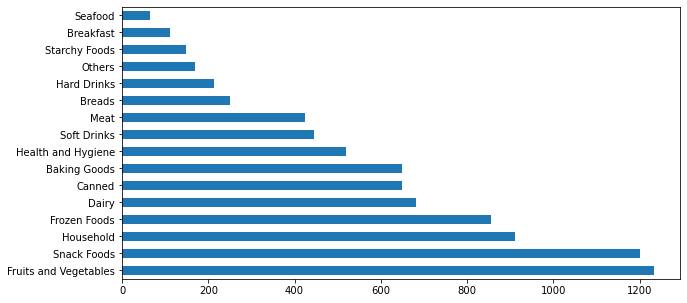

In [32]:
dataset['Item_Type'].value_counts().plot(kind='barh',figsize=(10,5))

In [33]:
dataset['Item_Fat_Content'].value_counts(normalize=True).mul(100).round(1)

Low Fat    64.7
Regular    35.3
Name: Item_Fat_Content, dtype: float64

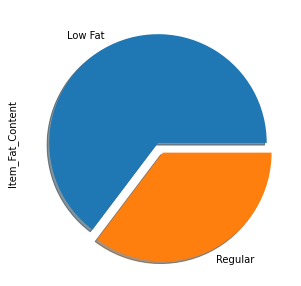

In [34]:
dataset['Item_Fat_Content'].value_counts(normalize=True).mul(100).round(1).plot(kind='pie',figsize=(10,5),explode=(0,0.1),shadow=True)

In [35]:
dataset['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

In [36]:
dataset['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

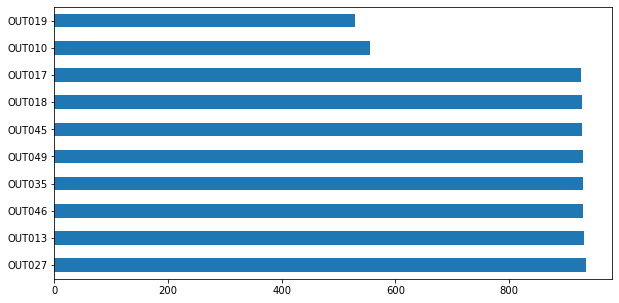

In [37]:
dataset['Outlet_Identifier'].value_counts().plot(kind='barh',figsize=(10,5))

In [38]:
dataset['Outlet_Size'].value_counts(normalize=True).mul(100).round(1)

Medium    61.0
Small     28.0
High      10.9
Name: Outlet_Size, dtype: float64

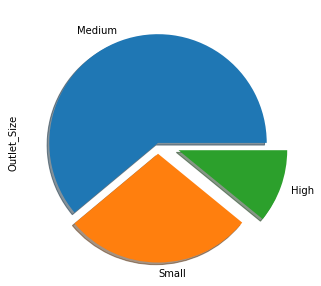

In [39]:
dataset['Outlet_Size'].value_counts(normalize=True).mul(100).round(1).plot(kind='pie',figsize=(10,5),explode=(0,0.1,0.2),shadow=True)

In [40]:
dataset['Outlet_Location_Type'].value_counts(normalize=True).mul(100).round(1)

Tier 3    39.3
Tier 2    32.7
Tier 1    28.0
Name: Outlet_Location_Type, dtype: float64

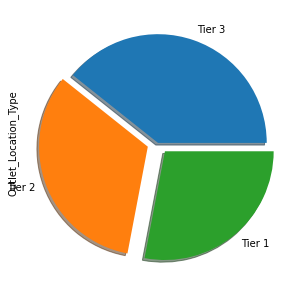

In [41]:
dataset['Outlet_Location_Type'].value_counts(normalize=True).mul(100).round(1).plot(kind='pie',figsize=(10,5),explode=(0,0.1,0.1),shadow=True)

In [42]:
dataset['Outlet_Type'].value_counts(normalize=True).mul(100).round(1)

Supermarket Type1    65.4
Grocery Store        12.7
Supermarket Type3    11.0
Supermarket Type2    10.9
Name: Outlet_Type, dtype: float64

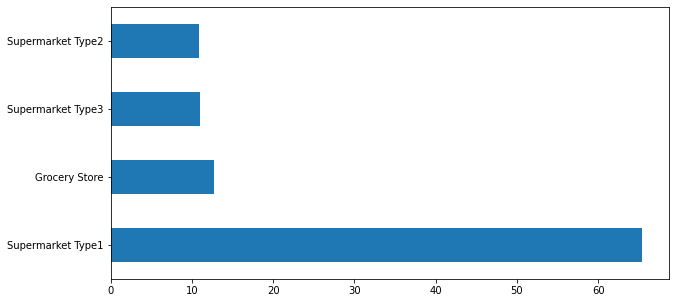

In [43]:
dataset['Outlet_Type'].value_counts(normalize=True).mul(100).round(1).plot(kind='barh',figsize=(10,5))

In [44]:
dataset.groupby(['Outlet_Location_Type','Outlet_Type']).size()

Outlet_Location_Type  Outlet_Type      
Tier 1                Grocery Store         528
                      Supermarket Type1    1860
Tier 2                Supermarket Type1    2785
Tier 3                Grocery Store         555
                      Supermarket Type1     932
                      Supermarket Type2     928
                      Supermarket Type3     935
dtype: int64

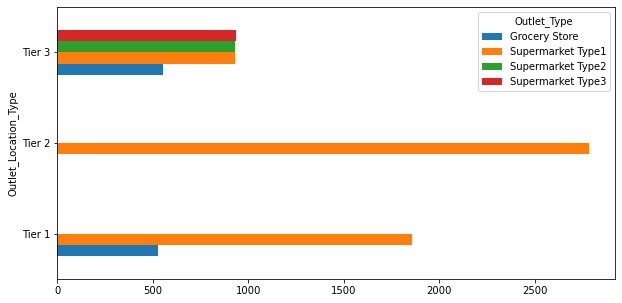

In [45]:
dataset.groupby(['Outlet_Location_Type','Outlet_Type']).size().unstack('Outlet_Type').plot(kind='barh',figsize=(10,5))

In [46]:
list1 = list(filter(lambda x:dataset.dtypes[x]=='O',dataset.columns))
list2 = list(filter(lambda x:dataset.dtypes[x]=='float64',dataset.columns))
print(list1)
print(list2)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']


In [47]:
(dataset['Item_Type'].value_counts()/len(dataset))*100

Fruits and Vegetables    14.455004
Snack Foods              14.079549
Household                10.676992
Frozen Foods             10.043412
Dairy                     8.001877
Canned                    7.614690
Baking Goods              7.602957
Health and Hygiene        6.101138
Soft Drinks               5.221166
Meat                      4.986507
Breads                    2.944972
Hard Drinks               2.510853
Others                    1.982870
Starchy Foods             1.736478
Breakfast                 1.290625
Seafood                   0.750909
Name: Item_Type, dtype: float64

In [48]:
dataset.pivot_table(index='Outlet_Location_Type',values='Item_Outlet_Sales')

,Item_Outlet_Sales
Outlet_Location_Type,
Tier 1,1876.909159
Tier 2,2323.990559
Tier 3,2279.627651


In [49]:
dataset['Age_of_Company'] = 2020-dataset['Outlet_Establishment_Year']

In [50]:
dataset.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age_of_Company
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,11
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,33
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,35
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986,18
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350,13


In [51]:
dataset['Age_of_Company'].describe()

count    8523.000000
mean       22.168133
std         8.371760
min        11.000000
25%        16.000000
50%        21.000000
75%        33.000000
max        35.000000
Name: Age_of_Company, dtype: float64

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [53]:
dataset['Outlet_Add'] = dataset['Outlet_Identifier'].str.split("0",n=1,expand=True)[1]

In [54]:
dataset['Outlet_Add'].unique()

array(['49', '18', '10', '13', '27', '45', '17', '46', '35', '19'],
      dtype=object)

In [55]:
dataset['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [56]:
def dummy(x):
    if x == 'High':
        return 3
    if x == 'Medium':
        return 2
    if x == 'Small':
        return 1

In [57]:
dataset['Outlet_Size_Dummy'] = dataset['Outlet_Size'].apply(dummy)

In [58]:
dataset['Outlet_Size_Dummy'].value_counts()

2    5203
1    2388
3     932
Name: Outlet_Size_Dummy, dtype: int64

In [59]:
def fatc(x):
    if x == 'Low Fat':
        return 0
    if x == 'Regular':
        return 1

In [60]:
dataset['Item_Fat_Content_Dummy'] = dataset['Item_Fat_Content'].apply(fatc)

In [61]:
dataset['Item_Fat_Content_Dummy'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content_Dummy, dtype: int64

In [62]:
dataset.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age_of_Company,Outlet_Add,Outlet_Size_Dummy,Item_Fat_Content_Dummy
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21,49,2,0
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11,18,2,1
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21,49,2,0
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,22,10,2,1
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33,13,3,0
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,11,18,2,1
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,33,13,3,1
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,35,27,2,0
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986,18,45,2,1
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350,13,17,2,1


In [63]:
def highD(x):
    if x == 3:
        return 1
    else:
        return 0

    
def medD(y):
    if y == 2:
        return 1
    else:
        return 0

In [64]:
dataset['High_Dummy'] = dataset['Outlet_Size_Dummy'].apply(highD)
dataset['Medium_Dummy'] = dataset['Outlet_Size_Dummy'].apply(medD)

In [65]:
dataset['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [66]:
dataset.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age_of_Company,Outlet_Add,Outlet_Size_Dummy,Item_Fat_Content_Dummy,High_Dummy,Medium_Dummy
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21,49,2,0,0,1
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11,18,2,1,0,1
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21,49,2,0,0,1
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,22,10,2,1,0,1
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33,13,3,0,1,0
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,11,18,2,1,0,1
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,33,13,3,1,1,0
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,35,27,2,0,0,1
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986,18,45,2,1,0,1
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350,13,17,2,1,0,1


In [67]:
def vis(x):
    if x == 0.0:
        return 0.066132
    else:
        return x

In [68]:
dataset['Item_Visibility1'] = dataset['Item_Visibility'].apply(vis)
dataset.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age_of_Company,Outlet_Add,Outlet_Size_Dummy,Item_Fat_Content_Dummy,High_Dummy,Medium_Dummy,Item_Visibility1
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21,49,2,0,0,1,0.016047
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11,18,2,1,0,1,0.019278
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21,49,2,0,0,1,0.016760
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,22,10,2,1,0,1,0.066132
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33,13,3,0,1,0,0.066132
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,11,18,2,1,0,1,0.066132
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,33,13,3,1,1,0,0.012741
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,35,27,2,0,0,1,0.127470
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986,18,45,2,1,0,1,0.016687
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350,13,17,2,1,0,1,0.094450


In [69]:
dataset['Item_Visibility1'].describe()

count    8523.000000
mean        0.070213
std         0.048742
min         0.003575
25%         0.033085
50%         0.062517
75%         0.094585
max         0.328391
Name: Item_Visibility1, dtype: float64

In [70]:
def tier3D(x):
    if x == 'Tier 3':
        return 1
    else:
        return 0
    
def tier2D(y):
    if y == 'Tier 2':
        return 1
    else:
        return 0

In [71]:
dataset['Tier3_Dummy'] = dataset['Outlet_Location_Type'].apply(tier3D)
dataset['Tier2_Dummy'] = dataset['Outlet_Location_Type'].apply(tier2D)

In [72]:
def sup3(x):
    if x == 'Supermarket Type3':
        return 1
    else:
        return 0
    
def sup2(y):
    if y == 'Supermarket Type2':
        return 1
    else:
        return 0
    
def sup1(z):
    if z == 'Supermarket Type1':
        return 1
    else:
        return 0

In [73]:
dataset['Supermarket3_Dummy'] = dataset['Outlet_Type'].apply(sup3)
dataset['Supermarket2_Dummy'] = dataset['Outlet_Type'].apply(sup2)
dataset['Supermarket1_Dummy'] = dataset['Outlet_Type'].apply(sup1)
dataset.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Outlet_Size_Dummy,Item_Fat_Content_Dummy,High_Dummy,Medium_Dummy,Item_Visibility1,Tier3_Dummy,Tier2_Dummy,Supermarket3_Dummy,Supermarket2_Dummy,Supermarket1_Dummy
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,...,2,0,0,1,0.016047,0,0,0,0,1
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,...,2,1,0,1,0.019278,1,0,0,1,0
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,...,2,0,0,1,0.016760,0,0,0,0,1
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,...,2,1,0,1,0.066132,1,0,0,0,0
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,...,3,0,1,0,0.066132,1,0,0,0,1
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,...,2,1,0,1,0.066132,1,0,0,1,0
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,...,3,1,1,0,0.012741,1,0,0,0,1
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,...,2,0,0,1,0.127470,1,0,1,0,0
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,...,2,1,0,1,0.016687,0,1,0,0,1
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,...,2,1,0,1,0.094450,0,1,0,0,1


In [74]:
X = dataset[['Item_Visibility1','Item_Weight','Item_MRP','Outlet_Add','Age_of_Company','Item_Fat_Content_Dummy','High_Dummy','Medium_Dummy','Tier3_Dummy','Tier2_Dummy','Supermarket3_Dummy','Supermarket2_Dummy','Supermarket1_Dummy']]
Y = dataset['Item_Outlet_Sales']

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.8, test_size=0.2, random_state=0)

In [76]:
X_train.describe()

,Item_Visibility1,Item_Weight,Item_MRP,Age_of_Company,Item_Fat_Content_Dummy,High_Dummy,Medium_Dummy,Tier3_Dummy,Tier2_Dummy,Supermarket3_Dummy,Supermarket2_Dummy,Supermarket1_Dummy
count,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000
mean,0.070136,12.902878,140.533479,22.153711,0.354796,0.107070,0.608683,0.388384,0.325755,0.108976,0.109123,0.655617
std,0.048614,4.223010,62.450304,8.360943,0.478487,0.309224,0.488081,0.487418,0.468691,0.311632,0.311816,0.475201
min,0.003598,4.555000,31.290000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.033060,9.395000,93.221850,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.062544,12.857645,142.115400,21.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.094352,16.100000,185.684500,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,0.328391,21.350000,266.888400,35.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
X_test.describe()

,Item_Visibility1,Item_Weight,Item_MRP,Age_of_Company,Item_Fat_Content_Dummy,High_Dummy,Medium_Dummy,Tier3_Dummy,Tier2_Dummy,Supermarket3_Dummy,Supermarket2_Dummy,Supermarket1_Dummy
count,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000
mean,0.070521,12.676767,142.829455,22.225806,0.344282,0.118475,0.617595,0.411730,0.330792,0.112610,0.107918,0.649267
std,0.049261,4.234964,61.553240,8.417093,0.475273,0.323265,0.486117,0.492291,0.470636,0.316208,0.310368,0.477340
min,0.003575,4.590000,31.955800,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.033276,9.210000,96.375200,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.062276,12.857645,144.247000,21.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.096295,15.850000,185.624000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,0.304859,21.350000,266.588400,35.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
reg = LinearRegression()

In [79]:
reg.fit(X_train,Y_train)

LinearRegression()

In [80]:
reg.score(X_test,Y_test)

0.5642781721679226

In [81]:
Y_prediction = reg.predict(X_test)

In [82]:
df = pd.DataFrame({'Actual':Y_test, 'Predicted':Y_prediction})
df

,Actual,Predicted
4931,1426.1436,2465.679910
4148,1201.7690,2520.086607
7423,1836.2764,2212.180245
4836,2410.8618,2412.075226
944,1549.9824,3088.102660
...,...,...
4644,3235.7880,1619.965882
6179,555.2772,1053.749678
1861,2885.5772,4154.052933
3598,218.3824,-1022.162175


In [83]:
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test,Y_prediction))

Mean Absolute Error: 851.2332691952425


In [84]:
print('Mean Squared Error:',metrics.mean_squared_error(Y_test,Y_prediction))

Mean Squared Error: 1275296.550600727


In [85]:
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(Y_test,Y_prediction)))

Root Mean Squared Error: 1129.2902862420835


In [86]:
regression = LinearRegression()

In [87]:
regression.fit(X,Y)

LinearRegression()

In [88]:
regression.score(X,Y)

0.5634462930737998